## Final Project Submission

Please fill out:
* Student name: 
* Student pace: self paced / part time / full time
* Scheduled project review date/time: 
* Instructor name: 
* Blog post URL:


In [ ]:
# Charles Otieno Aloo
# Part time
# Date not given 
# Samuel Karu



In [1]:
import pandas as pd

df = pd.read_csv('data/kc_house_data.csv')
print(df.head())
print(df.describe())




           id        date     price  bedrooms  bathrooms  sqft_living  \
0  7129300520  10/13/2014  221900.0         3       1.00         1180   
1  6414100192   12/9/2014  538000.0         3       2.25         2570   
2  5631500400   2/25/2015  180000.0         2       1.00          770   
3  2487200875   12/9/2014  604000.0         4       3.00         1960   
4  1954400510   2/18/2015  510000.0         3       2.00         1680   

   sqft_lot  floors  waterfront  view  ...  grade  sqft_above  sqft_basement  \
0      5650     1.0         NaN   0.0  ...      7        1180            0.0   
1      7242     2.0         0.0   0.0  ...      7        2170          400.0   
2     10000     1.0         0.0   0.0  ...      6         770            0.0   
3      5000     1.0         0.0   0.0  ...      7        1050          910.0   
4      8080     1.0         0.0   0.0  ...      8        1680            0.0   

  yr_built  yr_renovated  zipcode      lat     long  sqft_living15  sqft_lot15  

array([[<Axes: title={'center': 'id'}>,
        <Axes: title={'center': 'price'}>,
        <Axes: title={'center': 'bedrooms'}>,
        <Axes: title={'center': 'bathrooms'}>],
       [<Axes: title={'center': 'sqft_living'}>,
        <Axes: title={'center': 'sqft_lot'}>,
        <Axes: title={'center': 'floors'}>,
        <Axes: title={'center': 'waterfront'}>],
       [<Axes: title={'center': 'view'}>,
        <Axes: title={'center': 'condition'}>,
        <Axes: title={'center': 'grade'}>,
        <Axes: title={'center': 'sqft_above'}>],
       [<Axes: title={'center': 'yr_built'}>,
        <Axes: title={'center': 'yr_renovated'}>,
        <Axes: title={'center': 'zipcode'}>,
        <Axes: title={'center': 'lat'}>],
       [<Axes: title={'center': 'long'}>,
        <Axes: title={'center': 'sqft_living15'}>,
        <Axes: title={'center': 'sqft_lot15'}>, <Axes: >]], dtype=object)

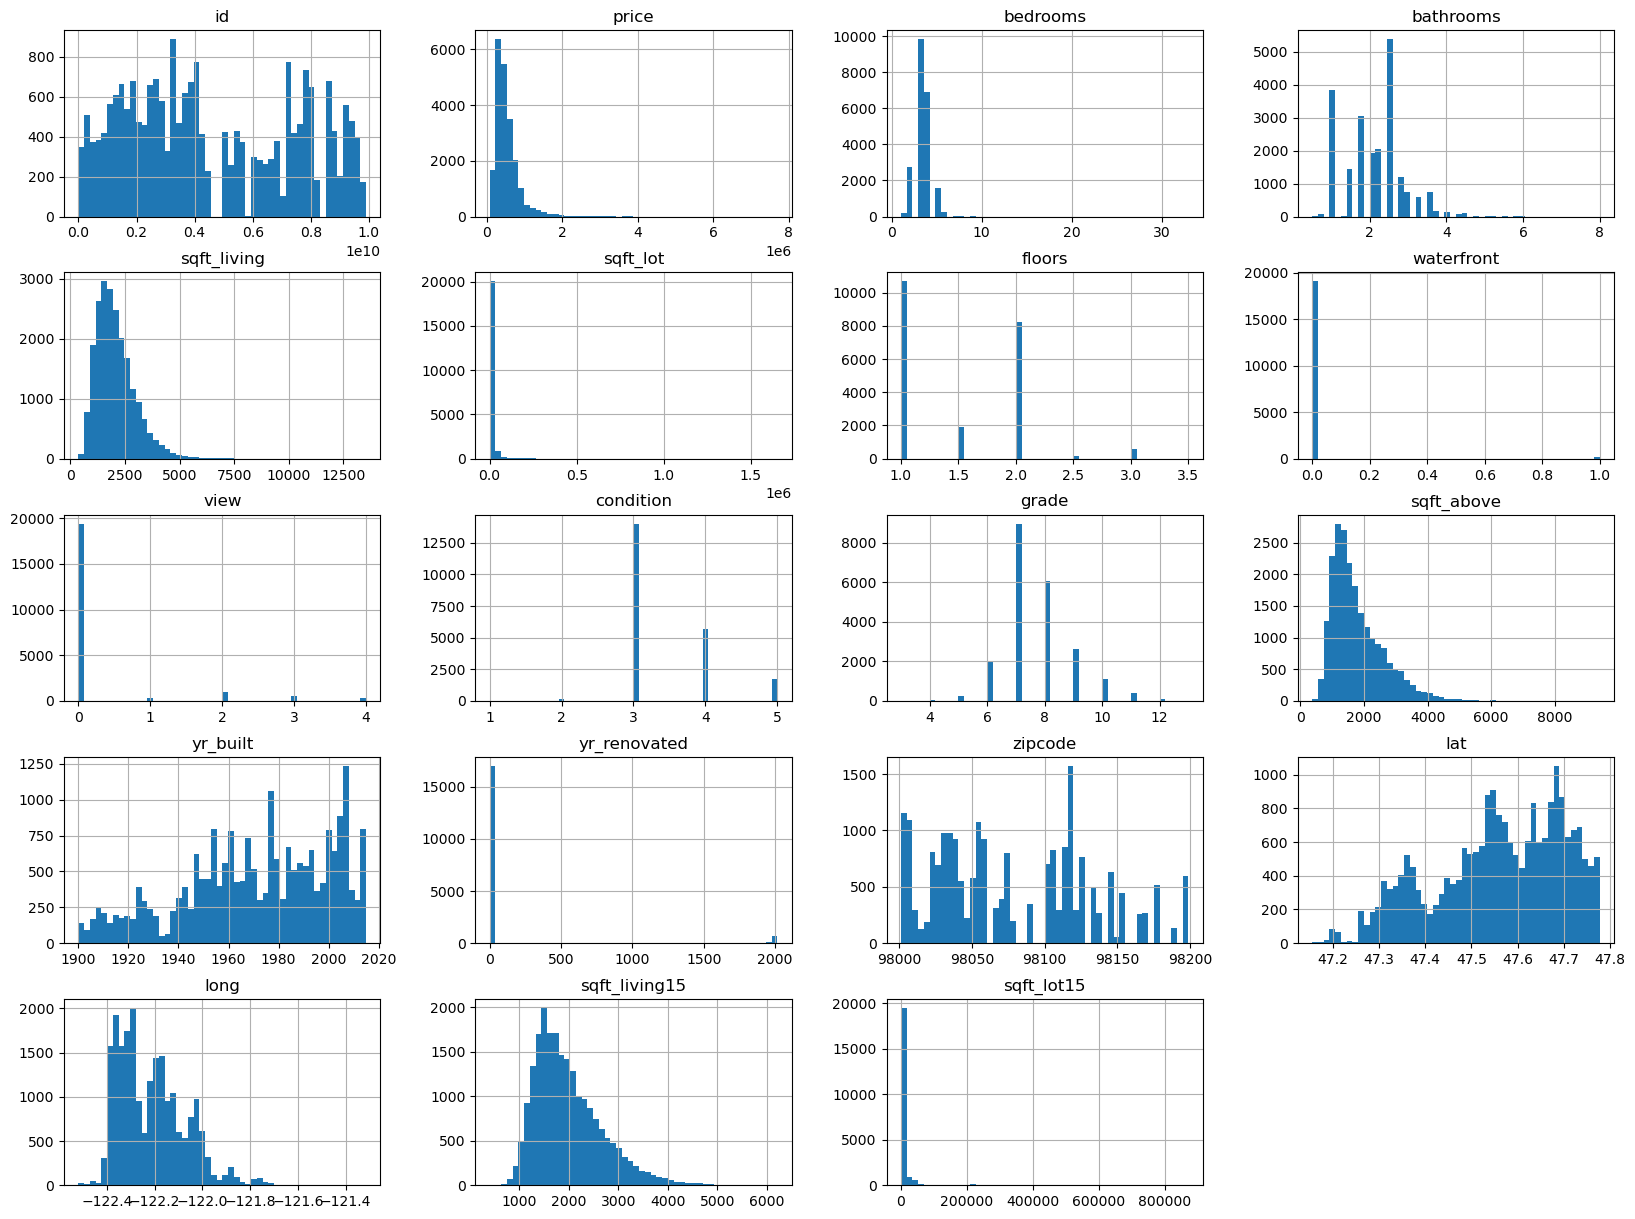

In [2]:
df.hist(bins=50, figsize=(20, 15))


C:\Users\ZBOOK\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


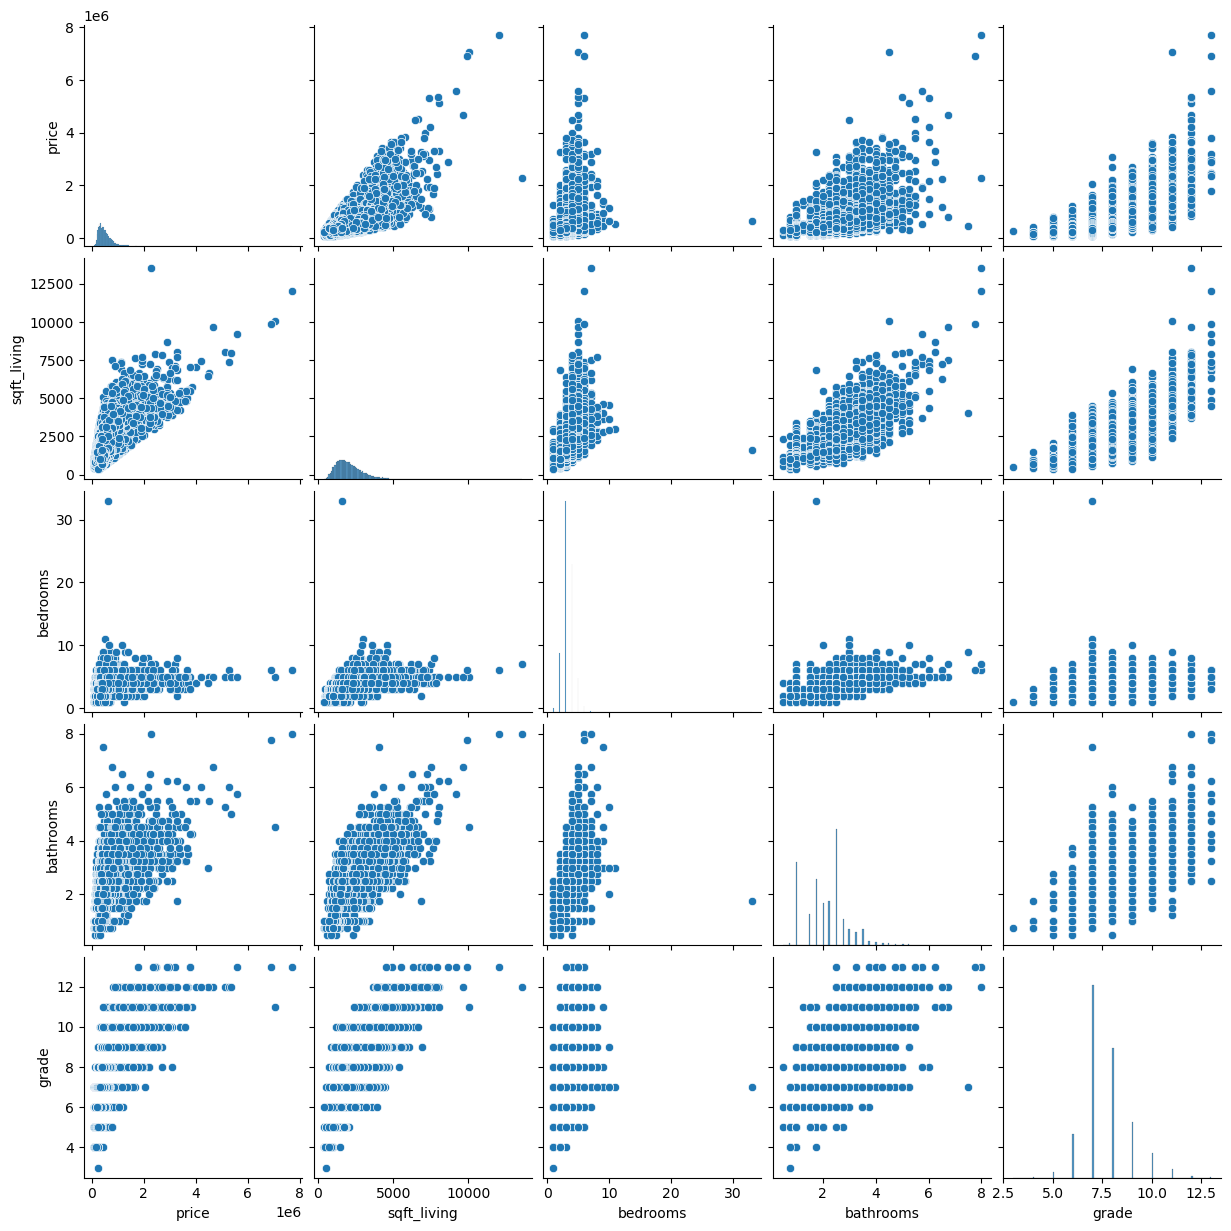

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.pairplot(df[['price', 'sqft_living', 'bedrooms', 'bathrooms', 'grade']])
plt.show()


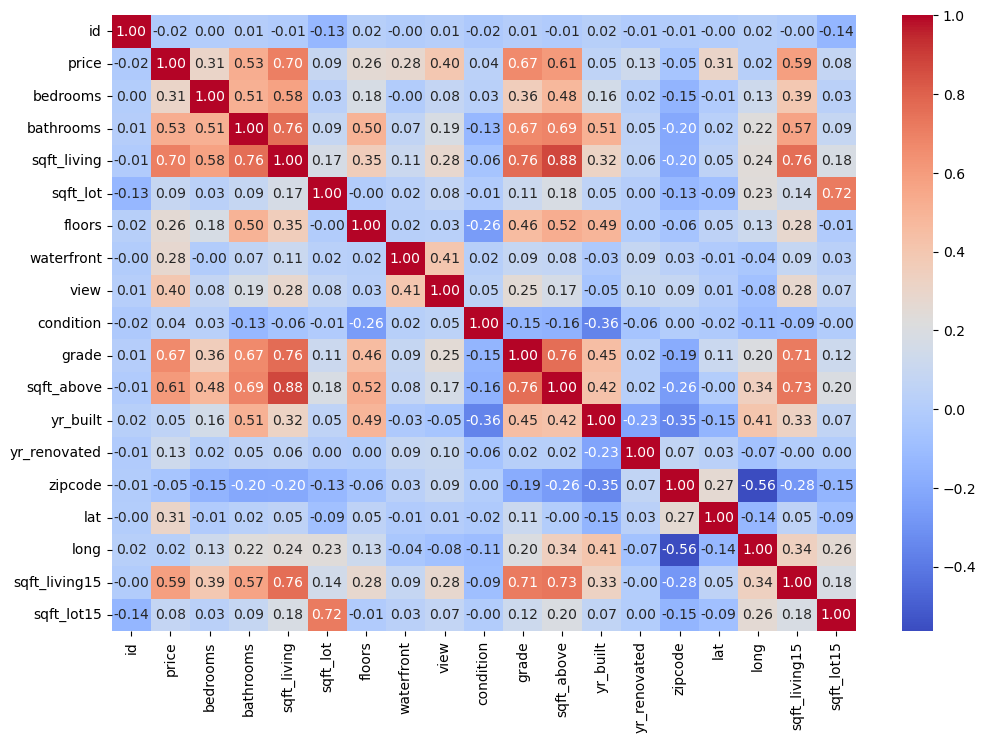

In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the data
df = pd.read_csv('data/kc_house_data.csv')

# Drop non-numeric columns
numeric_df = df.select_dtypes(include=[float, int])

# Compute the correlation matrix
corr_matrix = numeric_df.corr()

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.show()


In [10]:
# Check for missing values
print(data.isnull().sum())

# Handle missing values (example: fill with median)
data = data.fillna(data.median())


price              0
bedrooms           0
bathrooms          0
sqft_living        0
floors             0
waterfront      2376
view              63
condition          0
grade              0
yr_built           0
yr_renovated    3842
dtype: int64


In [12]:
from sklearn.model_selection import train_test_split

X = data.drop('price', axis=1)
y = data['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [13]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Build and train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

print(f'RMSE: {rmse}')
print(f'R^2: {r2}')


RMSE: 216981.58123968015
R^2: 0.6384399358031909


In [15]:
from sklearn.linear_model import Ridge

# Ridge regression model
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train, y_train)

# Make predictions
y_pred_ridge = ridge_model.predict(X_test)

# Evaluate the model
rmse_ridge = mean_squared_error(y_test, y_pred_ridge, squared=False)
r2_ridge = r2_score(y_test, y_pred_ridge)

print(f'Ridge RMSE: {rmse_ridge}')
print(f'Ridge R^2: {r2_ridge}')



Ridge RMSE: 216994.51762806918
Ridge R^2: 0.6383968222742096


In [16]:
# Get coefficients
coefficients = pd.DataFrame({'Feature': X.columns, 'Coefficient': model.coef_})
print(coefficients)


        Feature    Coefficient
0      bedrooms  -41619.023190
1     bathrooms   50574.811647
2   sqft_living     166.808377
3        floors   26662.397727
4    waterfront  592178.721526
5          view   45543.759896
6     condition   20584.562561
7         grade  126828.534444
8      yr_built   -3671.874997
9  yr_renovated       9.452248


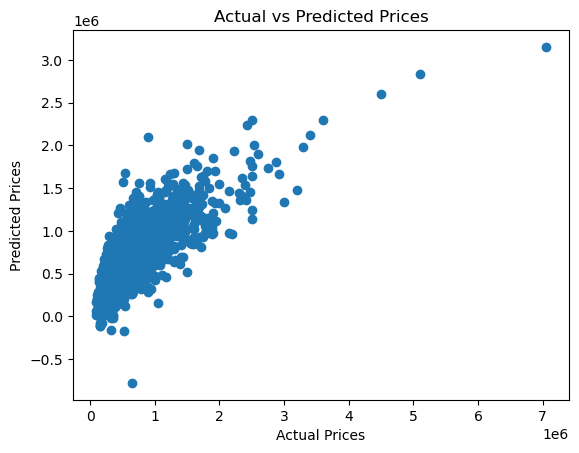

In [17]:
import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted Prices')
plt.show()


        Feature  Importance
7         grade    0.379353
2   sqft_living    0.323559
8      yr_built    0.137612
1     bathrooms    0.044939
5          view    0.028445
4    waterfront    0.025241
0      bedrooms    0.021016
6     condition    0.015656
3        floors    0.015122
9  yr_renovated    0.009058


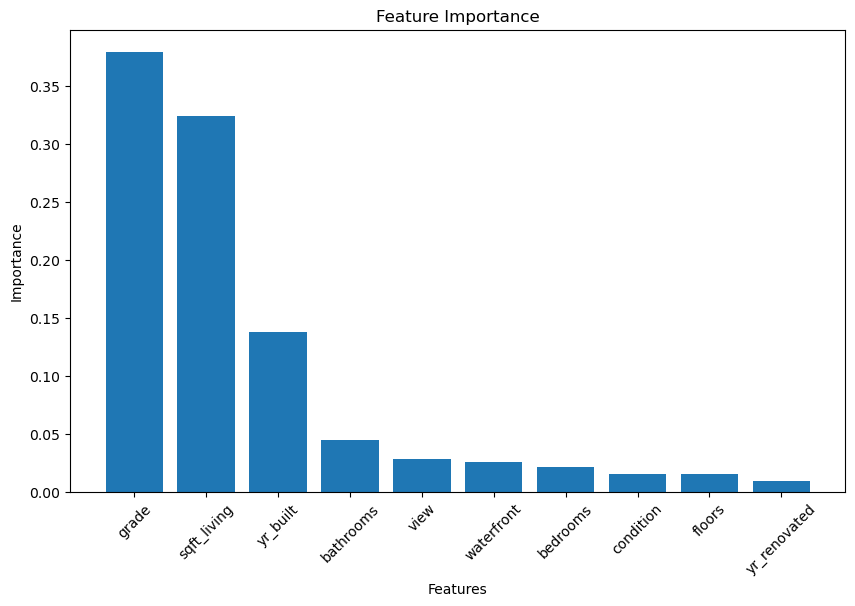

In [18]:
# For tree-based models (e.g., RandomForest)
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor()
rf_model.fit(X_train, y_train)

# Get feature importances
importances = pd.DataFrame({'Feature': X.columns, 'Importance': rf_model.feature_importances_})
importances = importances.sort_values(by='Importance', ascending=False)
print(importances)

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.bar(importances['Feature'], importances['Importance'])
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importance')
plt.xticks(rotation=45)
plt.show()


        Feature  Importance
7         grade    0.359553
2   sqft_living    0.345584
8      yr_built    0.135924
1     bathrooms    0.045291
5          view    0.028872
4    waterfront    0.025757
0      bedrooms    0.020542
6     condition    0.015603
3        floors    0.014170
9  yr_renovated    0.008705


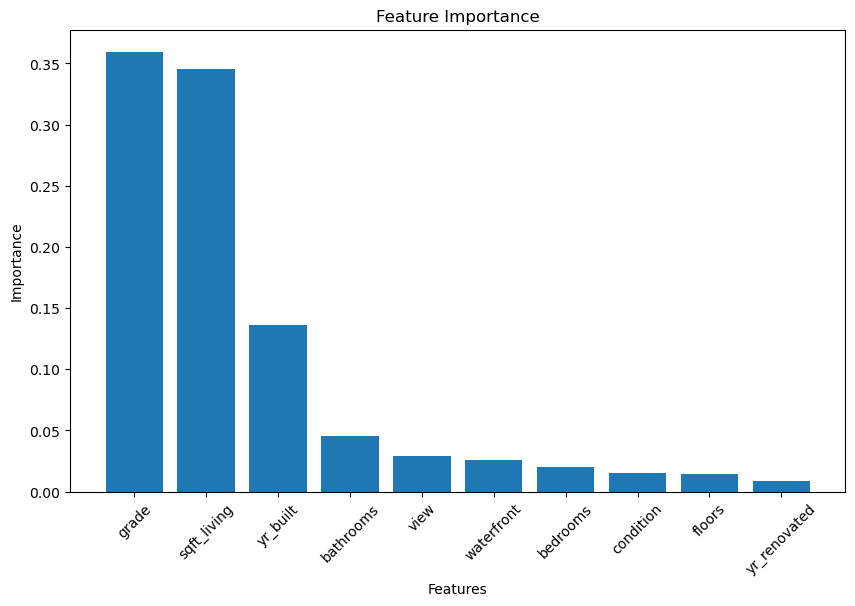

In [19]:
# For tree-based models (e.g., RandomForest)
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor()
rf_model.fit(X_train, y_train)

# Get feature importances
importances = pd.DataFrame({'Feature': X.columns, 'Importance': rf_model.feature_importances_})
importances = importances.sort_values(by='Importance', ascending=False)
print(importances)

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.bar(importances['Feature'], importances['Importance'])
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importance')
plt.xticks(rotation=45)
plt.show()


        Feature  Importance
7         grade    0.373445
2   sqft_living    0.331099
8      yr_built    0.137600
1     bathrooms    0.043068
4    waterfront    0.028089
5          view    0.026862
0      bedrooms    0.021549
6     condition    0.015532
3        floors    0.014758
9  yr_renovated    0.007997


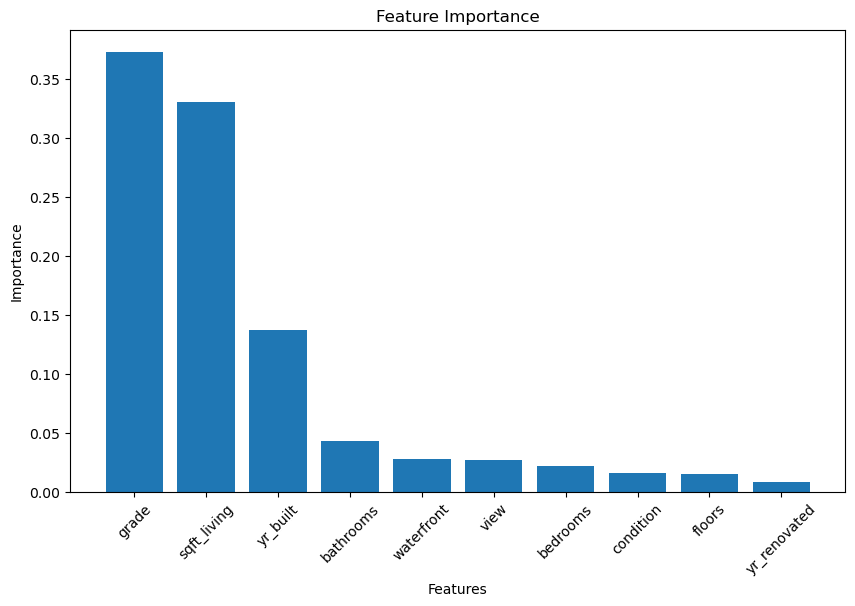

In [20]:
# For tree-based models (e.g., RandomForest)
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor()
rf_model.fit(X_train, y_train)

# Get feature importances
importances = pd.DataFrame({'Feature': X.columns, 'Importance': rf_model.feature_importances_})
importances = importances.sort_values(by='Importance', ascending=False)
print(importances)

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.bar(importances['Feature'], importances['Importance'])
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importance')
plt.xticks(rotation=45)
plt.show()
